In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import math


In [ ]:
'''
This project aims to visualize the periodic surges in Covid-19 cases.
These most recent surges are primarily caused by the Delta Variant of Covid-19 which is a more infectious
version of the original covid-19 (https://www.cdc.gov/coronavirus/2019-ncov/variants/delta-variant.html)

Four Countries ('United States','Canada','Mexico','India'), as well as the EU, will have their Total Cases, New Cases, Total Cases per Million, and New Cases per Million
starting from December 2020 (when the first Delta variant case was reported in India,
https://www.webmd.com/lung/news/20210804/will-the-delta-variant-peak-and-then-burn-out) to present-day plotted.

Observations will be made based on these plots along with other variables and attempt to correlate them with observations made by media outlets.


'''
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

##Viewing Data Composition

In [ ]:
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117466 entries, 0 to 117465
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               117466 non-null  object 
 1   continent                              112095 non-null  object 
 2   location                               117466 non-null  object 
 3   date                                   117466 non-null  object 
 4   total_cases                            111681 non-null  float64
 5   new_cases                              111678 non-null  float64
 6   new_cases_smoothed                     110663 non-null  float64
 7   total_deaths                           101006 non-null  float64
 8   new_deaths                             101161 non-null  float64
 9   new_deaths_smoothed                    110663 non-null  float64
 10  total_cases_per_million                111092 non-null  

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117461,ZWE,Africa,Zimbabwe,2021-09-13,126399.0,130.0,104.000,4543.0,5.0,7.143,8375.137,8.614,6.891,301.017,0.331,0.473,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4063.0,1188549.0,78.753,0.269,3654.0,0.242,0.028,35.1,tests performed,4752356.0,2856655.0,1895701.0,NaN,NaN,41369.0,31.49,18.93,12.56,NaN,2741.0,65.74,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117462,ZWE,Africa,Zimbabwe,2021-09-14,126817.0,418.0,145.857,4550.0,7.0,6.714,8402.833,27.696,9.664,301.481,0.464,0.445,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5427.0,1193976.0,79.112,0.360,3900.0,0.258,0.037,26.7,tests performed,4800761.0,2873593.0,1927168.0,NaN,48405.0,43831.0,31.81,19.04,12.77,NaN,2904.0,65.74,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117463,ZWE,Africa,Zimbabwe,2021-09-15,127083.0,266.0,164.571,4551.0,1.0,4.857,8420.459,17.625,10.904,301.547,0.066,0.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6482.0,1200458.0,79.542,0.429,3899.0,0

##Simple Preprocessing

In [ ]:
#checking duplicates#

print("Is there duplicate data?",data.duplicated())


#dropping NaN#

#eliminating columns filled with nulls
for col in data:
  if (pd.isna(data[col].loc[0])):
    data.drop([col],axis=1,inplace=True)

#eliminating rows with NaNs
'''
for col in data:
  data.dropna(subset=[col],inplace=True)'''


#date to datetime
data['date'] = pd.to_datetime(data['date'])

print()
print()
data.info()

Is there duplicate data? 0         False
1         False
2         False
3         False
4         False
          ...  
117461    False
117462    False
117463    False
117464    False
117465    False
Length: 117466, dtype: bool


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117466 entries, 0 to 117465
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    117466 non-null  object        
 1   continent                   112095 non-null  object        
 2   location                    117466 non-null  object        
 3   date                        117466 non-null  datetime64[ns]
 4   total_cases                 111681 non-null  float64       
 5   new_cases                   111678 non-null  float64       
 6   total_cases_per_million     111092 non-null  float64       
 7   new_cases_per_million       111089 non-null  float64       
 8   str

##Visualization functions

In [ ]:
bycountry = []
#split dataset into 5 datasets of interested countries
for x in ['United States','Canada','Mexico','European Union','India']:
  bycountry.append(data.loc[data.location==x])


In [ ]:
plt.style.use('fivethirtyeight')
total = len(bycountry)



key= '''total_cases
new_cases
total_cases_per_million
new_cases_per_million''' 
#stringency_index
key = key.split("\n")


STATIC_KEYS= '''population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
cardiovasc_death_rate
diabetes_prevalence
handwashing_facilities
hospital_beds_per_thousand
life_expectancy
human_development_index'''
STATIC_KEYS = STATIC_KEYS.split("\n")

def wordformat(word):
  '''Eliminates underscores and capitalizes'''
  newWord = word[0].upper()
  for x in range(1,len(word)):
    if (word[x] == '_'):
      newWord += ' '
    elif (word[x-1] == '_'):
      newWord += word[x].upper()
    else:
      newWord += word[x]
  return newWord
    


def plotSpec(datasets, col, fignum, datebegin):
  ''' Plots multiple countries in @param: datasets with a y-axis of @param: col'''
  plt.figure(fignum)
  for dataset in datasets:
    xvar = np.array(dataset.date)
    yvar = np.array(dataset[col])
    plt.plot(xvar, yvar, label=dataset.location.unique()[0])
  plt.legend()
  plt.xlabel("Date")
  plt.xticks(rotation=45)
  plt.ylabel(wordformat(col))
  plt.title(wordformat(col) + " vs Time")
  plt.xlim((np.datetime64(datebegin),np.datetime64('2021-09-01')))
  plt.show()
  print()
  print()
  
def countryinfo(dataset):
  '''depicts information of a country'''
  print(dataset.location.unique()[0])
  for static in STATIC_KEYS:
    print(static, np.array(dataset[static])[0])
  print()
  print()


def rank(datasets,col):
  '''ranks country from the highs @param: col to the lowest'''
  lst = []
  name= {}
  for ds in datasets:
      lst.append(np.array(ds[col])[0])
      name[np.array(ds[col])[0]]= ds.location.unique()[0]
  lst.sort()
  lst.reverse()
  w = 1
  for x in lst:
    try:
      print(str(w)+".",name[x],"-",x)
      w+=1
    except: pass
  

##Visualize Data

Rank by Population
1. India - 1393409033.0
2. European Union - 447189915.0
3. United States - 332915074.0
4. Mexico - 130262220.0
5. Canada - 38067913.0

Rank by Population Density
1. India - 450.41900000000004
2. Mexico - 66.444
3. United States - 35.608000000000004
4. Canada - 4.037

--Health Ranks--

Cardiovascular Death Rate
1. India - 282.28
2. Mexico - 152.783
3. United States - 151.089
4. Canada - 105.59899999999999

--Economy and Well Being--

GDP Per Capita
1. United States - 54225.445999999996
2. Canada - 44017.59099999999
3. Mexico - 17336.468999999997
4. India - 6426.674

Life Expectancy
1. Canada - 82.43
2. United States - 78.86
3. Mexico - 75.05
4. India - 69.66

Human Development Index
1. Canada - 0.929
2. United States - 0.9259999999999999
3. Mexico - 0.779
4. India - 0.645

Hospital Beds Per Thousand
1. United States - 2.77
2. Canada - 2.5
3. Mexico - 1.38
4. India - 0.53



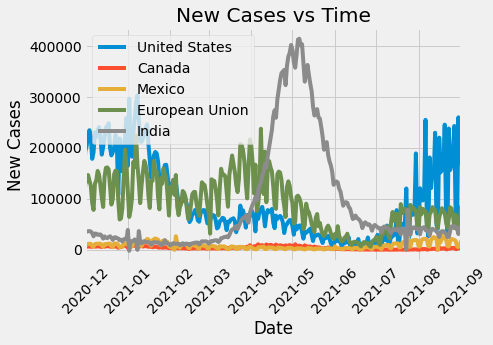

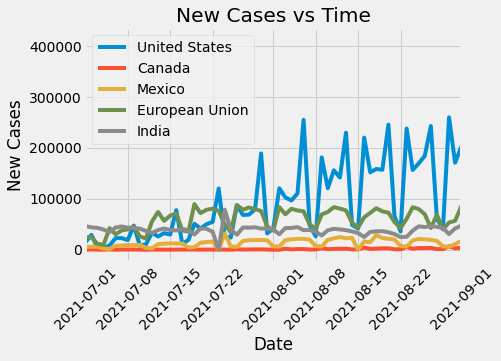

In [ ]:

'''Interesting Observations'''

print("Rank by Population")
rank(bycountry,"population")
print()
print("Rank by Population Density")
rank(bycountry,"population_density")
print()

print("--Health Ranks--")
print()
print("Cardiovascular Death Rate")
rank(bycountry,"cardiovasc_death_rate")
print()
print("--Economy and Well Being--")
print()
print("GDP Per Capita")
rank(bycountry, "gdp_per_capita")
print()
print(wordformat("life_expectancy"))
rank(bycountry, "life_expectancy")
print()
print(wordformat("human_development_index"))
rank(bycountry, "human_development_index")
print()
print(wordformat("hospital_beds_per_thousand"))
rank(bycountry, "hospital_beds_per_thousand")
print()




plotSpec(bycountry,"new_cases",1,datebegin='2020-12-01')

plotSpec(bycountry,"new_cases",1,datebegin='2021-07-01') #change to June to see beginning of US, Canda, EU, and Mexico peak more closely



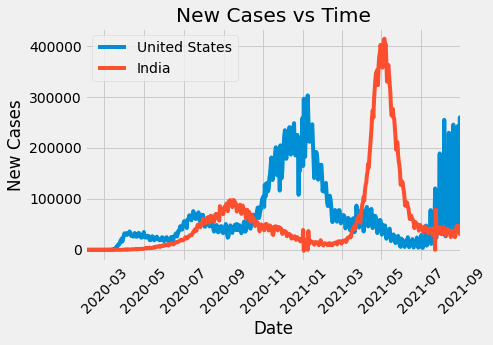

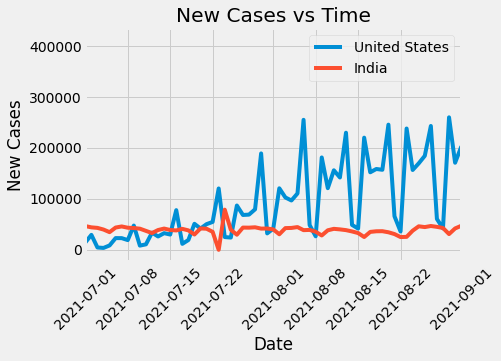

In [ ]:
#Just US and India

US_India = [data.loc[data.location=="United States"],data.loc[data.location=="India"]]

plotSpec(US_India,"new_cases",1,datebegin='2020-02-01') #Shows that US past peaks have not surpassed India's Delta Variant Peak

plotSpec(US_India,"new_cases",1,datebegin='2021-07-01')

#OBSERVATIONS

In [ ]:
'''Observations: 
As one can see in the graphs above until about 3 months after India's first instance of the Delta Variant there was a sudden surge in covid-19 cases.
A peak was reached in around May of 2021 until falling back down rapidly around July of 2021. Soon after this, a sudden reversal of the declining covid cases
in other countries started increasing rapidly. These cases were primarily caused by the Delta Variant spreading out of India. July of 2021 is a key month as some articles
(https://www.webmd.com/lung/news/20210804/will-the-delta-variant-peak-and-then-burn-out) started reporting a sudden surge in covid cases with 83% being because
of the delta variant.

Odd Observations and Naive Estimations:

Interestingly, the surge, peak, and decline of the Delta Variant in India only lasted about 4 months. However, the U.S. along with the other countries depicted have seen an ongoing
surge for 3 months. This is odd because the U.S. slightly outranks India in development. These aspects of a country can be very indicative of how well a country
responds to a pandemic. Countries with less population and population density see fewer transmissions. Countries with higher GDP per capita and higher development have more access to hospitals
and better quality healthcare. This intuitively means our Delta Variant surge should be a lot quicker and less severe but it is not (quicker at least).

What we can say for sure is that our "surge" as well as the other countries listed above is not facing as rapid of a surge as India is. This can be attributed to
the factors listed above but it is still uncertain why the surge is elongated in comparison to India.

A naive estimate can be made that given the current state the U.S. is at with regards to new covid cases, the U.S. should be very close at its "peak."
Because the U.S. is seeing a slower development of the Delta Variant and because of the United State's higher development and because the new caseload is reaching high
and close to India's peak, a similar decline effect should be seen shortly.
'''


##More Graphs

###Total Cases

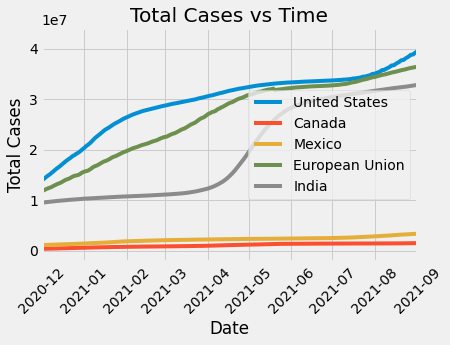

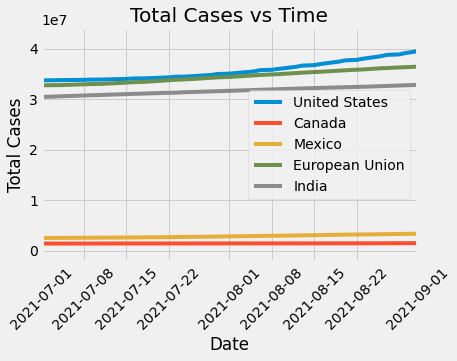

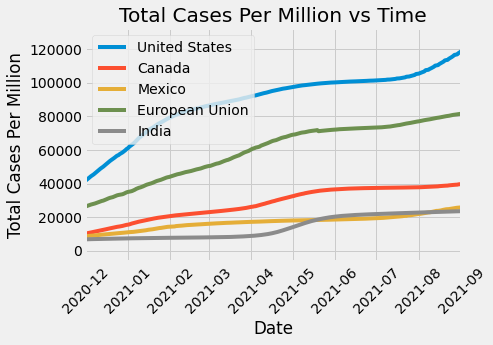

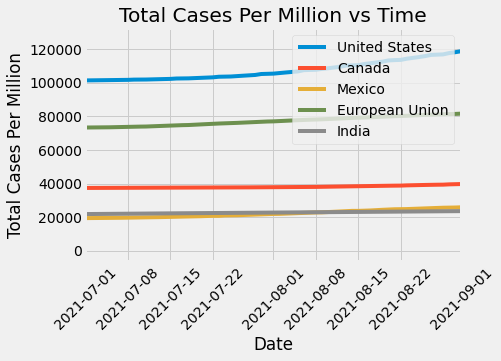



Those sudden increases are indicative of the surge in Delta Variant Cases


In [ ]:
plotSpec(bycountry,"total_cases",1,datebegin='2020-12-01')

plotSpec(bycountry,"total_cases",1,datebegin='2021-07-01') #change to June to see beginning of US, Canda, EU, and Mexico peak more closely


plotSpec(bycountry,"total_cases_per_million",1,datebegin='2020-12-01')

plotSpec(bycountry,"total_cases_per_million",1,datebegin='2021-07-01') 

print("Those sudden increases are indicative of the surge in Delta Variant Cases")

###New Cases per Million

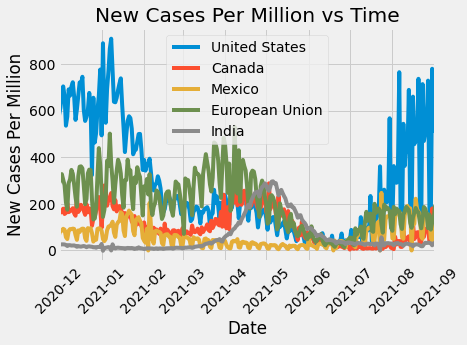

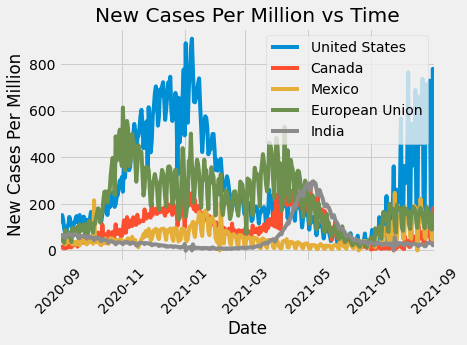

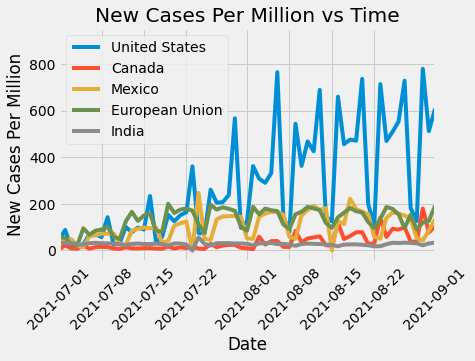

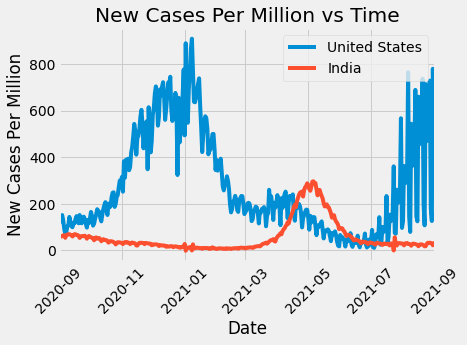

In [ ]:
plotSpec(bycountry,"new_cases_per_million",1,datebegin='2020-12-01')

plotSpec(bycountry,"new_cases_per_million",1,datebegin='2020-09-01') #View US previous peak

plotSpec(bycountry,"new_cases_per_million",1,datebegin='2021-07-01') #change to June to see beginning of US, Canda, EU, and Mexico peak more closely

plotSpec(US_India,"new_cases_per_million",1,datebegin='2020-09-01') #View US previous peak along with India

In [ ]:
'''
Looking at new cases per million information brings a completely new perspective.
With this information, the spreading rate is substantially higher in the US than in India with regards to the delta variant,
This makes sense. India has a significantly larger population than the United States and if the raw "New Case" numbers were similar
then the probability that someone in the US has the delta variant is way higher than someone in India having the delta variant.

This still does not necessarily disprove our previous estimate. Previous US peaks, even with respect to population, stop at about the same point we are currently at now. 
Especially given that more and more people are taking medical precautions to build immunity than ever before, cases should be starting to fall soon.

However, this data could suggest that we are nowhere near close to the peak. A few reasons:
1] India has not seen a substantially large peak like this (recently). The delta variant can cause never seen peaks in other countries as well.
2] A Per Million basis shows the spread based on population. Given that more people per million have it in the US means it is significantly more likely to 
spread amongst US citizens because you are more likely to run into someone who has it than running into someone who has it in India.

Still, there are too many other factors to draw a definitive conclusion. How civilians respond to covid outbreaks and policies passed can have massive impacts on the spread of these variants. It seems that the US will eventually reach a peak and have a decrease in cases. When this will happen is uncertain? Either we are at the peak now
 or the delta variant is something that needs to be taken way more seriously if a spike in India were to be replicated in the US.
'''
